## SHAP

In [1]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from materials import MLPs_predict
import joblib

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
sample_clf = pd.read_csv('clf_sample_shap.csv')
sample_mlps = pd.read_csv('mlps_sample_shap.csv')
                        
model_name = ['svc', 'best_committee', 'strong_ANN_committee', 'moderate_ANN_committee', 'weak_ANN_committee']
filenames = [
    'best_svc_model.joblib', 
    'mlps_best_models.joblib',
    'mlps_strong_models.joblib',
    'mlps_mid_models.joblib',
    'mlps_weak_models.joblib',
]

all_models = {}

for name, filename in zip(model_name, filenames):            
    all_models[name] = joblib.load(filename)
                 

def MLPs_predict_wrapper(model_type):
    def wrapper(X):
        return MLPs_predict(X, models=all_models[model_type], var=False)
    return wrapper

x_cols_std = ['Photoinitiator\nAmount', 'NGF\nConcentration', 'Peptide\nLoading']

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


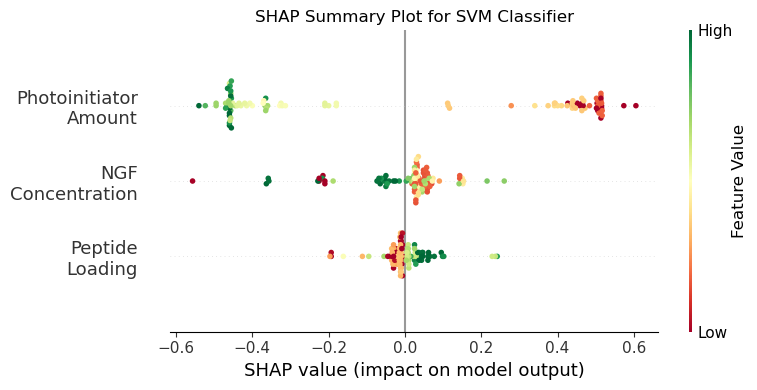

In [3]:
# SHAP summary plot for SVM classifier
clf = all_models['svc']
explainer = shap.Explainer(clf.predict, sample_clf)
shap_values_clf = explainer(sample_clf)

shap.summary_plot(shap_values_clf, 
                  sample_clf, 
                  feature_names=x_cols_std,
                  plot_size=[8, 4],
                  cmap='RdYlGn',
                  color_bar_label='Feature Value',
                  show=False)
plt.title(f'SHAP Summary Plot for SVM Classifier')
plt.tight_layout()
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


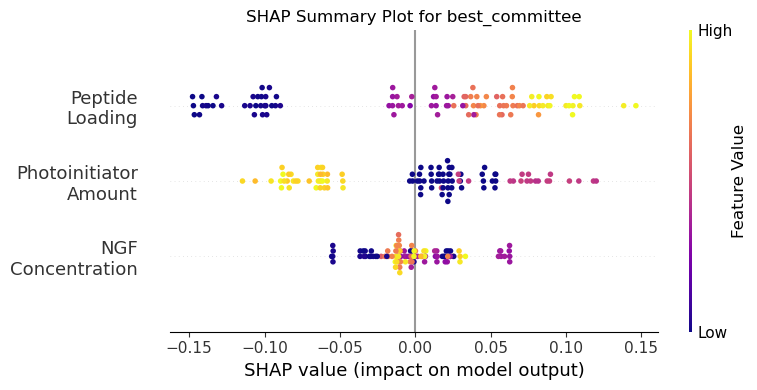

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


<Figure size 640x480 with 0 Axes>

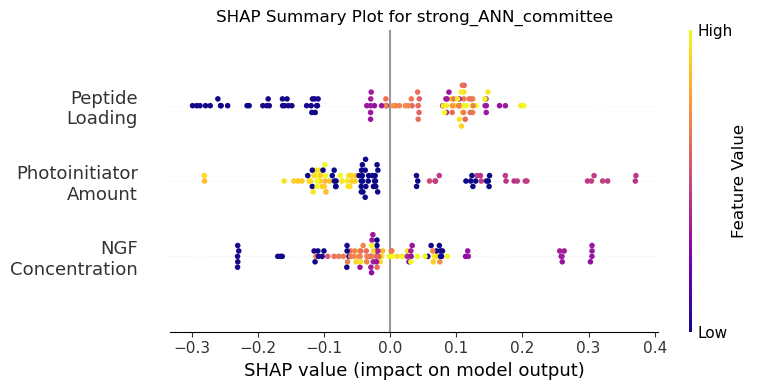

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


<Figure size 640x480 with 0 Axes>

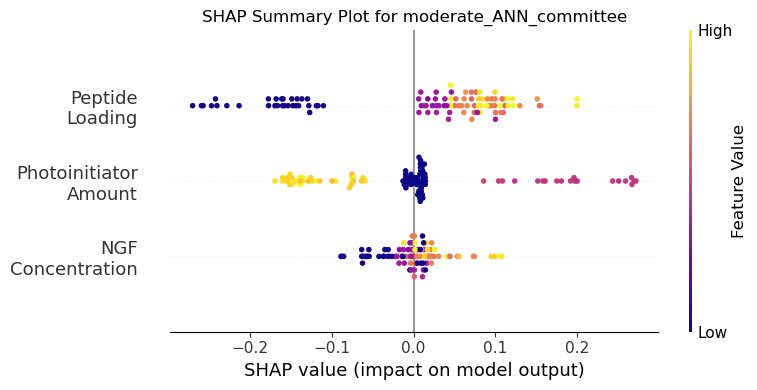

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


<Figure size 640x480 with 0 Axes>

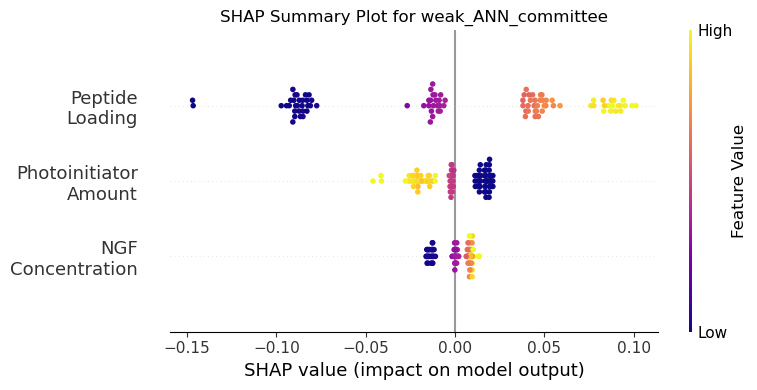

<Figure size 640x480 with 0 Axes>

In [4]:
for model in model_name[1:]:
    MLPs = MLPs_predict_wrapper(model)
    explainer = shap.Explainer(MLPs, sample_mlps)
    shap_values_mlps = explainer(sample_mlps)
    
    plt.figure()
    shap.summary_plot(shap_values_mlps, 
                      sample_mlps, 
                      feature_names=x_cols_std,
                      plot_size=[8, 4],
                      cmap='plasma',
                      color_bar_label='Feature Value',
                      show=False)
    plt.title(f'SHAP Summary Plot for {model}')
    plt.tight_layout()
    plt.show()
    plt.clf()

## Parameters for Adjusting Plots

In [ ]:
# fig = plt.gcf()
# ax = plt.gca()
# ax.grid(False)
# [ax.plot([shap_values_mlp.values.min(), shap_values_mlp.values.max()], [i, i],  linestyle='--', color='grey', lw=0.5) for i in range(3)]   
# ax.set_xticklabels([])
# ax.set_xticks([])   
# ax.set_xlabel('')
# [ax.plot([-0.2, 0.2], [i, i],  linestyle='--', color='grey', lw=0.5) for i in range(3)]
# ax.plot([-0.2, 0.2], [-0.9, -0.9], linestyle='-', color='k', lw=1.5, zorder=500)
# for i in np.arange(-0.2, 0.3, 0.1):
#     ax.plot([i, i], [-0.9, -1], linestyle='-', color='k', lw=1, zorder=500)

# for spine in ax.spines.values():
#         spine.set_edgecolor('none')


# plt.savefig('110524_strong_shap_mae0027_sum.png', dpi=300)
# plt.show()